In [94]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [95]:
# Comment out appropriate portion
#tk = th.Thicket.from_caliperreader(glob("cali_files/*.cali"))
# tk = th.Thicket.from_caliperreader(glob("cali_files/Random/Strong_Scaling_MPI/*.cali"))
# tk = th.Thicket.from_caliperreader(glob("cali_files/MPI_Files/Weak_Test/*.cali"))
# tk = th.Thicket.from_caliperreader(glob("cali_files/MPI_Files/65536_Strong/*.cali"))

# tk = th.Thicket.from_caliperreader(glob("cali_files/MPI_Files/65536_Strong_Compare/*.cali"))
tk = th.Thicket.from_caliperreader(glob("cali_files/Aazmir/MPI/Weak/*.cali"))

In [96]:
# Performance data
tk.dataframe
#MPI
tk.dataframe = tk.dataframe.drop([('Min time/rank'),('Max time/rank'),('Total time'), ('Variance time/rank'), ('nid')], axis=1)

In [97]:
tk.metadata

,cali.caliper.version,mpi.world.size,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:node.order,spot:output,spot:time.variance,launchdate,libraries,cmdline,cluster,Algorithm,ProgrammingModel,Datatype,SizeOfDatatype,InputSize,InputType,num_procs,num_threads,num_blocks,group_num,implementation_source
profile,,,,,,,,,,,,,,,,,,,,,,,,,,
14976296,2.11.0-dev,2,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,s1-p2-a65536.cali,true,1699998343,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./enumeration_sort, 65536, 1]",c,EnumerationSort,MPI,float,4,65536,Sorted,2,0,0,20,Online
1510987821,2.11.0-dev,2,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,s3-p2-a65536.cali,true,1699998355,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./enumeration_sort, 65536, 3]",c,EnumerationSort,MPI,float,4,65536,1%%perturbed,2,0,0,20,Online
1708326728,2.11.0-dev,128,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,s3-p128-a262144.cali,true,1700000390,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./enumeration_sort, 262144, 3]",c,EnumerationSort,MPI,float,4,262144,1%%perturbed,128,0,0,20,Online
1909514570,2.11.0-dev,2,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,s2-p2-a65536.cali,true,1699998355,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./enumeration_sort, 65536, 2]",c,EnumerationSort,MPI,float,4,65536,ReverseSorted,2,0,0,20,Online
2186783867,2.11.0-dev,128,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,s2-p128-a262144.cali,true,1700000390,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./enumeration_sort, 262144, 2]",c,EnumerationSort,MPI,float,4,262144,ReverseSorted,128,0,0,20,Online
2692079855,2.11.0-dev,2,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,s0-p2-a65536.cali,true,1699998343,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./enumeration_sort, 65536, 0]",c,EnumerationSort,MPI,float,4,65536,Random,2,0,0,20,Online
2900065346,2.11.0-dev,128,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,s0-p128-a262144.cali,true,1700000369,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./enumeration_sort, 262144, 0]",c,EnumerationSort,MPI,float,4,262144,Random,128,0,0,20,Online
3202301327,2.11.0-dev,128,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,s1-p128-a262144.cali,true,1700000390,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./enumeration_sort, 262144, 1]",c,EnumerationSort,MPI,float,4,262144,Sorted,128,0,0,20,Online


In [98]:
tk.metadata
tk.statsframe.dataframe["time"] = 1
print(tk.tree())

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2023.3.0

1.000 main
├─ 1.000 comm
│  └─ 1.000 comm_large
│     ├─ 1.000 MPI_Bcast
│     └─ 1.000 MPI_Gather
├─ 1.000 comp
│  └─ 1.000 comp_large
├─ 1.000 correctness_check
└─ 1.000 data_init

Legend (Metric: time Min: 1.00 Max: 1.00)
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00

name User code    ◀  Only in left graph    ▶  Only in right graph



In [99]:
# strong
# gb = tk.groupby([("InputSize"),("Algorithm")])
# gb = tk.groupby([("InputSize"), ("InputType")])
# weak
gb = tk.groupby([("InputType")])

4  thickets created...
{('1%%perturbed',): <thicket.thicket.Thicket object at 0x2b39265f39d0>, ('Random',): <thicket.thicket.Thicket object at 0x2b3924826d60>, ('ReverseSorted',): <thicket.thicket.Thicket object at 0x2b39265d7ca0>, ('Sorted',): <thicket.thicket.Thicket object at 0x2b3926c049a0>}


In [100]:
ctk = th.Thicket.concat_thickets(
    thickets=list(gb.values()),
    headers=list(gb.keys()),
    axis="columns",
    #MPI
    metadata_key="num_procs"
)

In [101]:
ctk.dataframe

(1%%perturbed,)  \
                                                               spot.channel   
node                                              num_procs                   
{'name': 'main', 'type': 'function'}              2           regionprofile   
                                                  128         regionprofile   
{'name': 'comm', 'type': 'function'}              2           regionprofile   
                                                  128         regionprofile   
{'name': 'comm_large', 'type': 'function'}        2           regionprofile   
                                                  128         regionprofile   
{'name': 'MPI_Bcast', 'type': 'function'}         2           regionprofile   
                                                  128         regionprofile   
{'name': 'MPI_Gather', 'type': 'function'}        2           regionprofile   
                                                  128         regionprofile   
{'name': 'comp', 'type': 'function'}              2           regionprofile   
                                                  128         regionprofile   
{'name': 'comp_large', 'type': 'function'}        2           regionprofile   
                                                  128         regionprofile   
{'name': 'correctness_check', 'type': 'function'} 2           regionprofile   
                                                  128         regionprofile   
{'name': 'data_init', 'type': 'function'}         2           regionprofile   
                                                  128         regionprofile   

                                                                           \
                                                            Avg time/rank   
node                                              num_procs                 
{'name': 'main', 'type': 'function'}              2             19.271878   
                                                  128          161.832165   
{'name': 'comm', 'type': 'function'}              2              0.018600   
                                                  128            1.077629   
{'name': 'comm_large', 'type': 'function'}        2              0.018569   
                                                  128            1.077592   
{'name': 'MPI_Bcast', 'type': 'function'}         2              0.015669   
                                                  128            0.948602   
{'name': 'MPI_Gather', 'type': 'function'}        2              0.002860   
                                                  128            0.128941   
{'name': 'comp', 'type': 'function'}              2             18.291627   
                                                  128          146.736211   
{'name': 'comp_large', 'type': 'function'}        2             18.291580   
                                                  128          146.735624   
{'name': 'correctness_check', 'type': 'function'} 2              0.000177   
                                                  128            0.221683   
{'name': 'data_init', 'type': 'function'}         2              0.000381   
                                                  128            0.001499   

                                                                 (Random,)  \
                                                              spot.channel   
node                                              num_procs                  
{'name': 'main', 'type': 'function'}              2          regionprofile   
                                                  128        regionprofile   
{'name': 'comm', 'type': 'function'}              2          regionprofile   
                                                  128        regionprofile   
{'name': 'comm_large', 'type': 'function'}        2          regionprofile   
                                                  128        regionprofile   
{'name': 'MPI_Bcast', 'type': 'function'}         2          regionprofile   
  

In [102]:
# Drop unwanted columns
ctk.dataframe = ctk.dataframe.reset_index().drop([("node", "")], axis=1)

# Rename index to remove tuple
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_procs", ""): "num_procs"}).set_index(["name", "num_procs"])



In [103]:
# Define common variables
function_names = set(ctk.dataframe.index.get_level_values("name"))
procs = sorted(list(set(ctk.dataframe.index.get_level_values("num_procs"))))
matrix_sizes = sorted(ctk.dataframe.columns.tolist())
#time = set(ctk.dataframe.index.get_level_values("Total time"))

In [104]:
ctk.dataframe.loc["main"]

(1%%perturbed,)                    (Random,)                \
             spot.channel Avg time/rank   spot.channel Avg time/rank   
num_procs                                                              
2           regionprofile     19.271878  regionprofile     44.180628   
128         regionprofile    161.832165  regionprofile    267.900309   

          (ReverseSorted,)                    (Sorted,)                
              spot.channel Avg time/rank   spot.channel Avg time/rank  
num_procs                                                              
2            regionprofile     20.792537  regionprofile     30.498670  
128          regionprofile    156.197552  regionprofile    155.185149

In [105]:
def plot_pandas(df, title, xlabel, ylabel, loglog):
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        grid=True,
        loglog=loglog
    )
    return plot

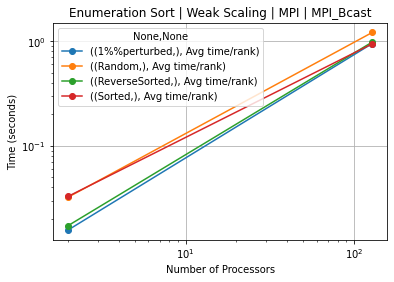

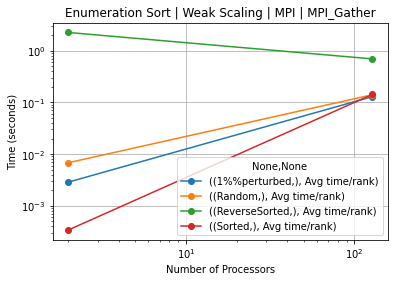

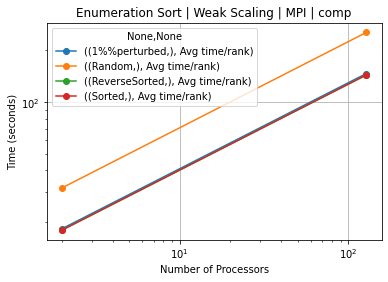

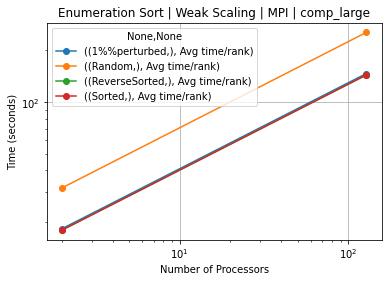

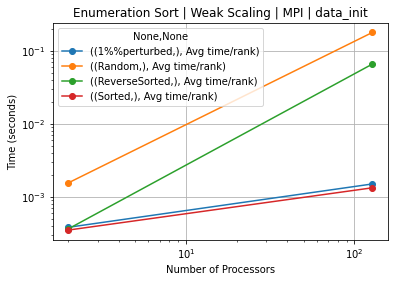

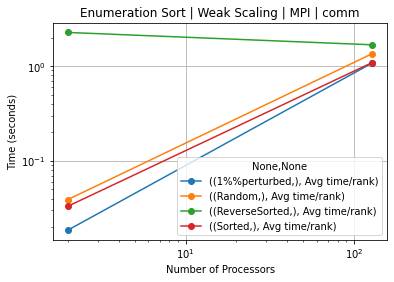

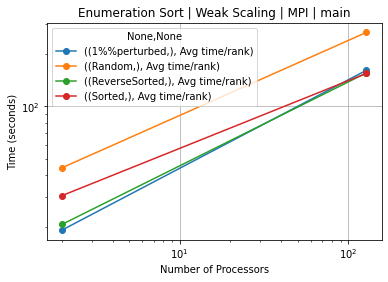

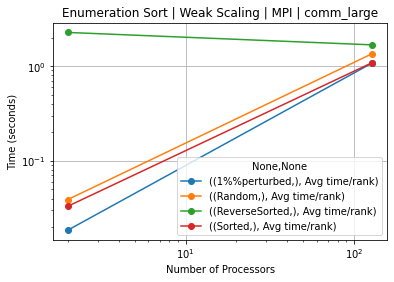

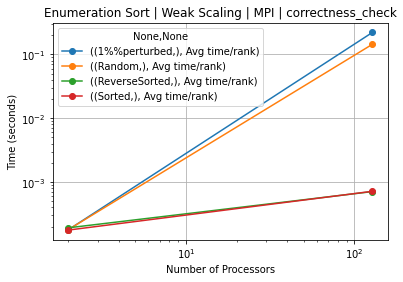

In [106]:
for name in function_names:
    plot_pandas(
        df=ctk.dataframe.loc[name],
        title="Enumeration Sort | Weak Scaling | MPI | " + name,
        xlabel="Number of Processors",
        ylabel="Time (seconds)",
        # set to False 
        loglog=True
    )

In [107]:
# how to get input_sizes?
# speed up
input_sizes = set(tk.metadata["InputSize"])
for name in function_names:
    for size in input_sizes:
        temp_df = ctk.dataframe[[col for col in ctk.dataframe.columns if col[0][0] == 65536 and col[1] == "Avg time/rank"]].loc[name]
        temp_df = temp_df.iloc[0]/temp_df

        plot_pandas (
            title = "Speed Up | MPI | " + name,
            xlabel = "Threads",
            ylabel = "Time (seconds)",
            # True or False? 
            loglog=True,
            df = temp_df
        )

TypeError: no numeric data to plot

In [47]:
temp_df = ctk.dataframe[[col for col in ctk.dataframe.columns if col[0][0] == 65536 and col[1] == "Avg time/rank"]].loc[name]
temp_df.iloc[0]/temp_df

,"(65536, 1%Perturbed)","(65536, Random)","(65536, ReverseSorted)","(65536, Sorted)"
,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank
num_procs,,,,
2,1.000000,1.000000,1.000000,1.000000
4,1.548673,0.529210,1.919355,1.346154
8,1.767677,0.608696,1.919355,1.842105
16,2.651515,0.383562,2.333333,1.666667
32,NaN,0.184321,1.208122,0.327103
64,0.028745,0.062323,0.048571,0.013933
128,0.034361,0.023893,0.029192,0.028848
256,0.006171,0.042861,0.014331,NaN
